# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [ ]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")

df['date'] = pd.to_datetime(df['date'])

df = df.set_index('date')



In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


Оставим только данные по городу Бангалор

In [ ]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [ ]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod"], axis=1
)

In [ ]:
ts.head()

,quantity
date,
2004-01-01,227832
2004-02-01,225133
2004-03-01,221952
2004-04-01,185150
2004-05-01,137390


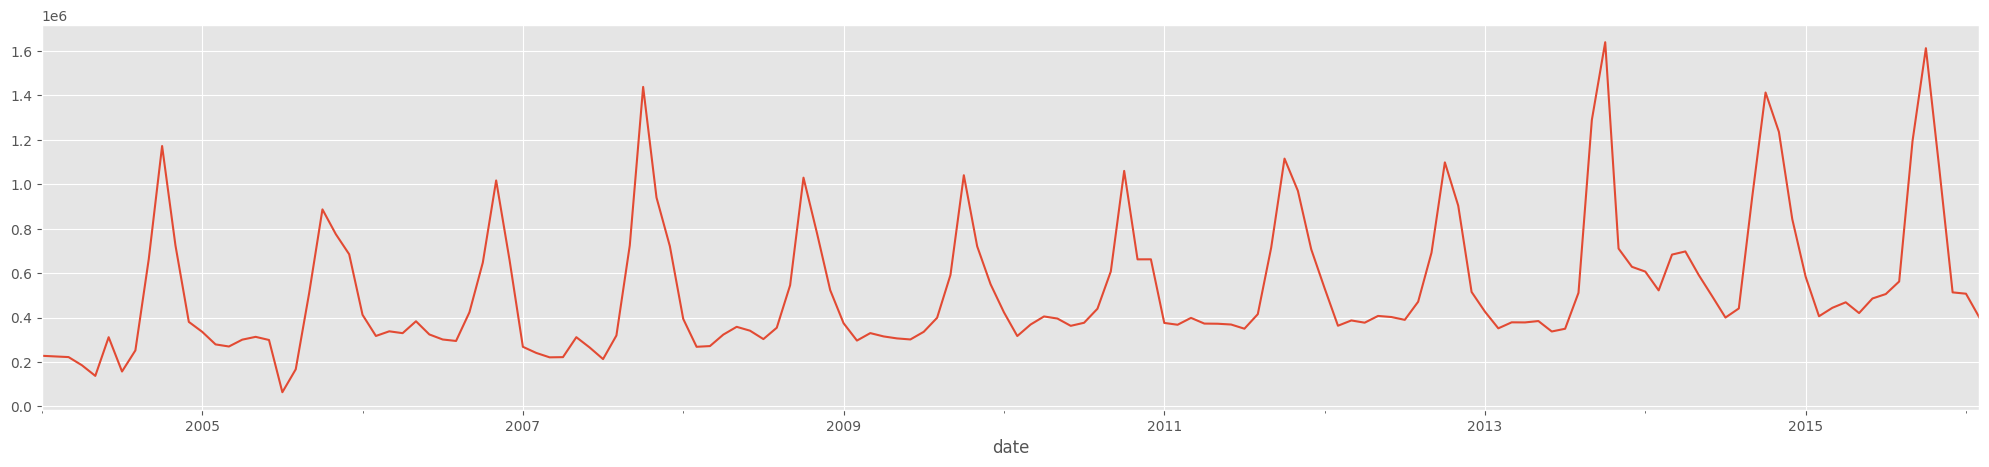

In [ ]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [ ]:
train = ts['quantity'][:int(len(ts) * 0.85)]

test = ts['quantity'][int(len(ts) * 0.85) :]

In [ ]:
test.shape[0]

22

In [ ]:
test

,quantity
date,
2014-05,591250
2014-06,496447
2014-07,399867
2014-08,440875
2014-09,941818
2014-10,1412686
2014-11,1235389
2014-12,842653
2015-01,583681


Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt, SimpleExpSmoothing

simple_exp = SimpleExpSmoothing(
    endog=train,
    initialization_method='estimated'
).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
holt = Holt(
    train,
    initialization_method='estimated',
).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
holt_d = Holt(
    train,
    initialization_method='estimated',
    damped_trend=True
).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


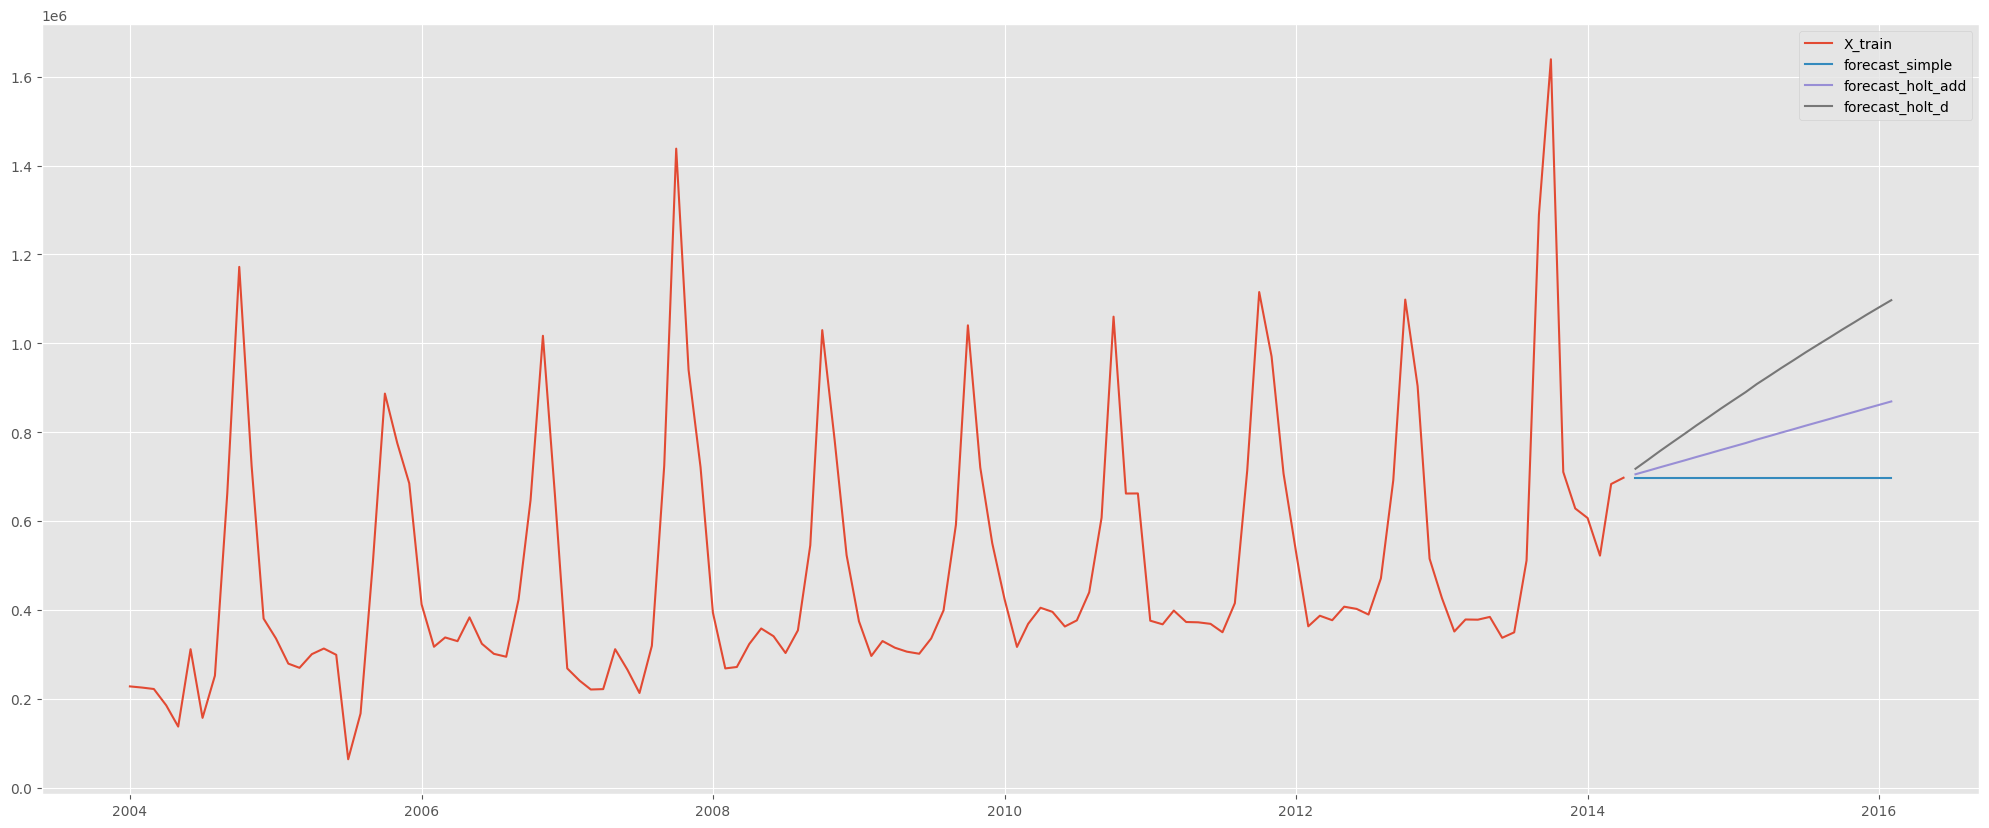

In [ ]:
plt.figure(figsize=(25,10))

forecast_1 = simple_exp.forecast(len(test))

plt.plot(train, label='X_train')

plt.plot(forecast_1, label='forecast_simple')

forecast_holt = holt.forecast(len(test))

forecast_holt_d = holt_d.forecast(len(test))

plt.plot(forecast_holt, label='forecast_holt_add')

plt.plot(forecast_holt_d, label='forecast_holt_d')

plt.legend()

In [ ]:
forecast_holt = holt.forecast(len(test))

forecast.plot()

## Quiz

У какой из трех обученных моделей самый быстро возрастающий тренд?

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

In [ ]:
model_add = ExponentialSmoothing(
    endog=train,
    use_boxcox=True,
    trend='add',
    seasonal='add',
    seasonal_periods=12

).fit()

model_add_t_and_mull_s = ExponentialSmoothing(
    endog=train,
    use_boxcox=True,
    trend='add',
    seasonal='mul',
    seasonal_periods=12

).fit()

model_add_t_and_add_s_d_t = ExponentialSmoothing(
    endog=train,
    use_boxcox=True,
    trend='add',
    seasonal='add',
    seasonal_periods=12,
    damped_trend=True

).fit()

model_add_t_and_mull_s_d_t = ExponentialSmoothing(
    endog=train,
    use_boxcox=True,
    trend='add',
    seasonal='mul',
    seasonal_periods=12,
    damped_trend=True

).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


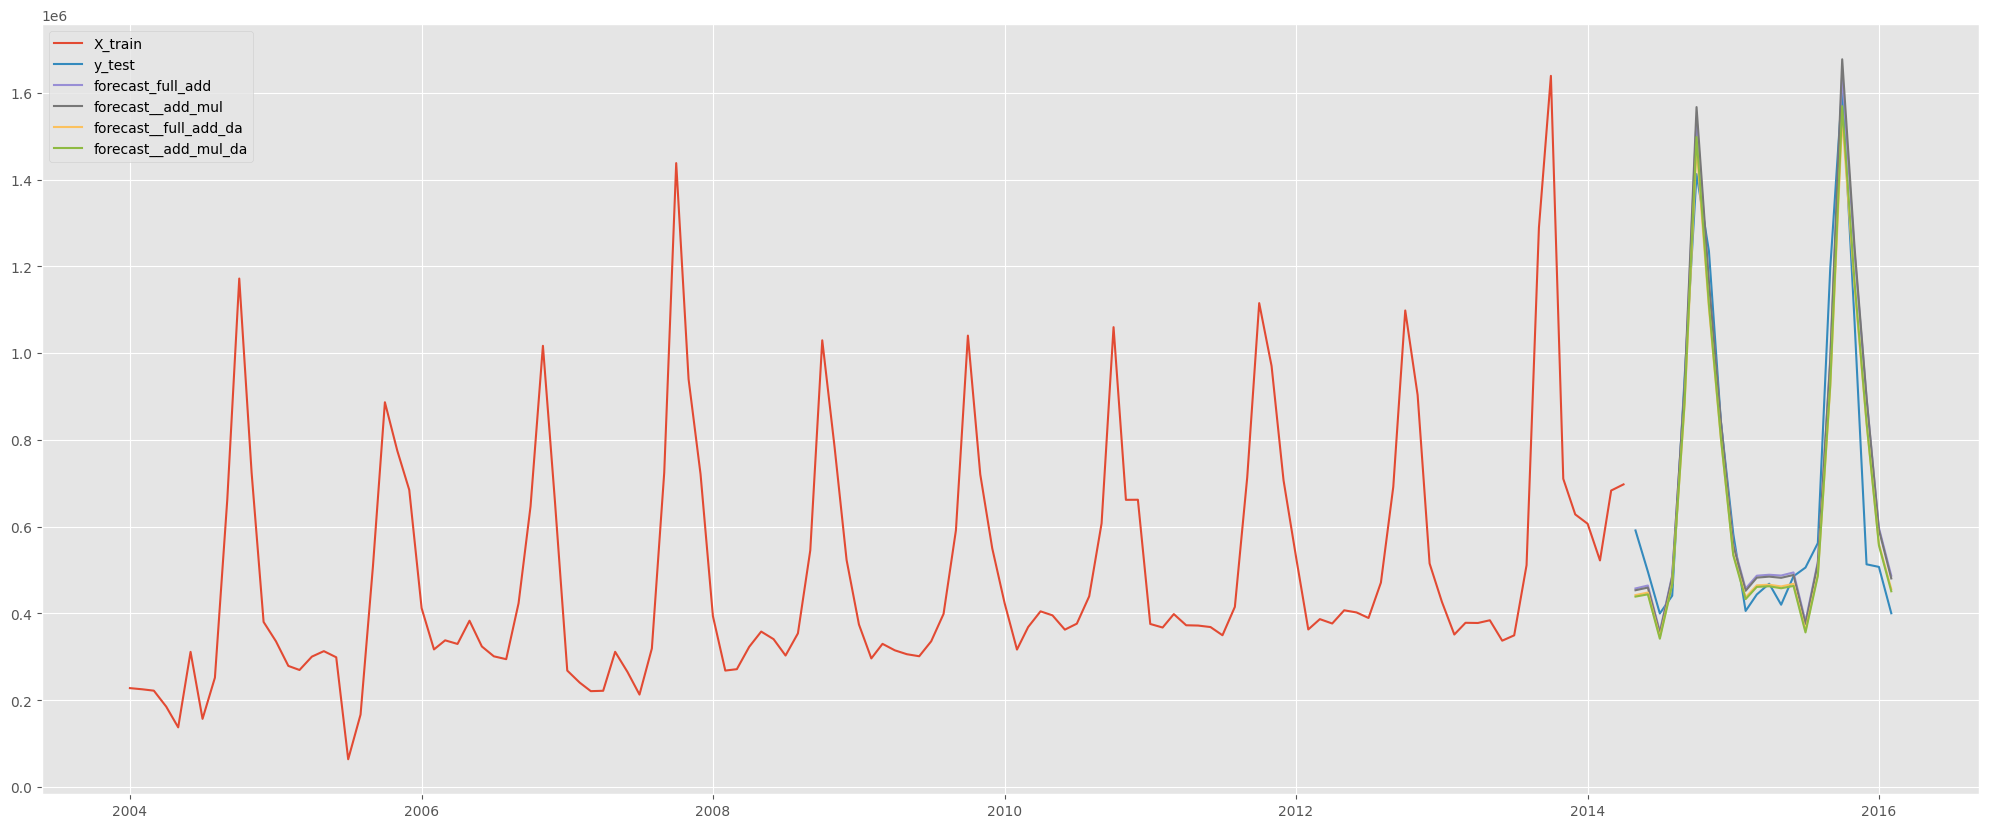

In [ ]:
plt.figure(figsize=(25, 10))
plt.plot(train.index, train,  label='X_train')

plt.plot(test.index, test, label='y_test')

forecast_1 = model_add.forecast(len(test))

forecast_2 = model_add_t_and_mull_s.forecast(len(test))

forecast_3 = model_add_t_and_add_s_d_t.forecast(len(test))

forecast_4 = model_add_t_and_mull_s_d_t.forecast(len(test))

plt.plot(forecast_1.index, forecast_1, label='forecast_full_add')

plt.plot(forecast_2.index, forecast_2 , label='forecast__add_mul')

plt.plot(forecast_3.index, forecast_3,  label='forecast__full_add_da')

plt.plot(forecast_4.index, forecast_4 , label='forecast__add_mul_da')

plt.legend(loc='best')

Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [ ]:
from sklearn.metrics import mean_squared_error

print(f"rmse model_add : {np.sqrt(mean_squared_error(test, forecast_1))}")

print(f"rmse model_add_mul : {np.sqrt(mean_squared_error(test, forecast_2))}")

print(f"rmse model_add_da : {np.sqrt(mean_squared_error(test, forecast_3))}")

print(f"rmse model_add_mul_da : {np.sqrt(mean_squared_error(test, forecast_4))}")

rmse model_add : 118556.35966369908
rmse model_add_mul : 120856.17205820924
rmse model_add_da : 113915.28311335793
rmse model_add_mul_da : 113899.133969394


## Quiz

Какая модель справилась лучше остальных?

## Quiz

Чему равно значение RMSE для лучшей модели? Ответ округлите до целого числа.

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [ ]:
err1 = np.sqrt(mean_squared_error(test, forecast_1, squared=False))

err2 = np.sqrt(mean_squared_error(test, forecast_2, squared=False))

err3 = np.sqrt(mean_squared_error(test, forecast_3, squared=False))

err4 = np.sqrt(mean_squared_error(test, forecast_4, squared=False))

print(min(err1, err2, err3, err4))

337.4894575677794


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

## Quiz

Какое семейство моделей лучше справилось с решением задачи:
SARIMAX или модели Хольта-Винтерса?

## Опциональное задание (без проверки)

Воспользуйтесь экспоненциальными моделями из библиотеки Orbit для получения прогноза в данной задаче.

In [ ]:
import orbit

from orbim.models import E